https://pandas.pydata.org/docs/user_guide/10min.html

# 1. Object Creation (객체 생성)

In [2]:
import pandas as pd
import numpy as np

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8]); s
#np.nan float

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
s = pd.Series([1,3,5,"",6,8]); s
#"" object

0    1
1    3
2    5
3     
4    6
5    8
dtype: object

In [5]:
#date_range('시작점', periods=기간) >>> freq를 변경하면 원하는 기간 단위를 선택할 수 있다.
dates = pd.date_range('20130101', periods=6); dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df=pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df
#np.random.randn(6,4) : 가우시안 표준 정규 분포에서 난수 matrix array 생성
#(6,4)를 지정해주었기 떄문에 index값 6개, column값 4개 필요

,A,B,C,D
2013-01-01,0.522535,-0.100105,2.113166,0.583349
2013-01-02,0.835325,0.433041,-0.016100,-1.359532
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397
2013-01-05,-0.220723,1.960231,0.331282,-0.245646
2013-01-06,0.592947,0.372136,1.800435,0.003827


In [7]:
df2=pd.DataFrame({'A' : 1.,
                  'B' : pd.Timestamp('20130102'),
                  'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                  'D' : np.array([3] * 4,dtype='int32'),
                  'E' : pd.Categorical(["test","train","test","train"]),
                  'F' : 'foo' })
df2
#데이터 프레임을 직접 써서 만들 수도 있다. > 인덱스별로 데이터 타입이 달라진다.

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      float64       
 1   B       4 non-null      datetime64[ns]
 2   C       4 non-null      float32       
 3   D       4 non-null      int32         
 4   E       4 non-null      category      
 5   F       4 non-null      object        
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 260.0+ bytes


# 2. Viewing Data (데이터 확인하기)

In [9]:
df.head(n=5)

,A,B,C,D
2013-01-01,0.522535,-0.100105,2.113166,0.583349
2013-01-02,0.835325,0.433041,-0.016100,-1.359532
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397
2013-01-05,-0.220723,1.960231,0.331282,-0.245646


In [10]:
df.tail(2)

,A,B,C,D
2013-01-05,-0.220723,1.960231,0.331282,-0.245646
2013-01-06,0.592947,0.372136,1.800435,0.003827


In [11]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [13]:
#컬럼 이름 변경하기
new_columns = ['AA', 'BB', 'CC', 'DD']
df.columns = new_columns; df

,AA,BB,CC,DD
2013-01-01,0.522535,-0.100105,2.113166,0.583349
2013-01-02,0.835325,0.433041,-0.016100,-1.359532
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397
2013-01-05,-0.220723,1.960231,0.331282,-0.245646
2013-01-06,0.592947,0.372136,1.800435,0.003827


In [14]:
new_columns2 = ['A', 'B', 'C', 'D']
df.columns = new_columns2; df

,A,B,C,D
2013-01-01,0.522535,-0.100105,2.113166,0.583349
2013-01-02,0.835325,0.433041,-0.016100,-1.359532
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397
2013-01-05,-0.220723,1.960231,0.331282,-0.245646
2013-01-06,0.592947,0.372136,1.800435,0.003827


In [15]:
df.values #ndarray형태(다차원의 행렬구조)

array([[ 0.5225347 , -0.10010495,  2.11316613,  0.58334915],
       [ 0.8353248 ,  0.43304071, -0.01609991, -1.35953233],
       [-0.4067406 ,  0.22280757, -0.03850656, -0.86862175],
       [ 1.61015809, -0.81316364, -1.64913353, -1.58839684],
       [-0.22072288,  1.96023085,  0.33128222, -0.24564605],
       [ 0.59294701,  0.37213642,  1.80043454,  0.00382666]])

In [16]:
#데이터의 기본적인 통계정보 요약
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.488917,0.345824,0.423524,-0.579170
std,0.734156,0.913438,1.375640,0.838315
min,-0.406741,-0.813164,-1.649134,-1.588397
25%,-0.034908,-0.019377,-0.032905,-1.236805
50%,0.557741,0.297472,0.157591,-0.557134
75%,0.774730,0.417815,1.433146,-0.058542
max,1.610158,1.960231,2.113166,0.583349


In [17]:
#전치. 행과 열을 바꿈
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.522535,0.835325,-0.406741,1.610158,-0.220723,0.592947
B,-0.100105,0.433041,0.222808,-0.813164,1.960231,0.372136
C,2.113166,-0.016100,-0.038507,-1.649134,0.331282,1.800435
D,0.583349,-1.359532,-0.868622,-1.588397,-0.245646,0.003827


In [18]:
#축별로 정렬
df.sort_index(axis=1, ascending=False)
#디폴트값 : axis=0 (행별로 정렬하는 것). ascending=True(오름차순) 
#cf) 넘파이의 축은 다차원이기 때문에 행과 열이 아님.

,D,C,B,A
2013-01-01,0.583349,2.113166,-0.100105,0.522535
2013-01-02,-1.359532,-0.016100,0.433041,0.835325
2013-01-03,-0.868622,-0.038507,0.222808,-0.406741
2013-01-04,-1.588397,-1.649134,-0.813164,1.610158
2013-01-05,-0.245646,0.331282,1.960231,-0.220723
2013-01-06,0.003827,1.800435,0.372136,0.592947


In [19]:
#값별로 정렬
df.sort_values(by='B')

,A,B,C,D
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397
2013-01-01,0.522535,-0.100105,2.113166,0.583349
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622
2013-01-06,0.592947,0.372136,1.800435,0.003827
2013-01-02,0.835325,0.433041,-0.016100,-1.359532
2013-01-05,-0.220723,1.960231,0.331282,-0.245646


# 3. Selection (선택)
## Getting (데이터 얻기)

In [20]:
df["A"]

2013-01-01    0.522535
2013-01-02    0.835325
2013-01-03   -0.406741
2013-01-04    1.610158
2013-01-05   -0.220723
2013-01-06    0.592947
Freq: D, Name: A, dtype: float64

In [21]:
df[["A","B"]]
#한 개 이상일 때는 리스트값으로 지정해야한다.

,A,B
2013-01-01,0.522535,-0.100105
2013-01-02,0.835325,0.433041
2013-01-03,-0.406741,0.222808
2013-01-04,1.610158,-0.813164
2013-01-05,-0.220723,1.960231
2013-01-06,0.592947,0.372136


In [22]:
#행을 분할하여 선택
df[0:3]

,A,B,C,D
2013-01-01,0.522535,-0.100105,2.113166,0.583349
2013-01-02,0.835325,0.433041,-0.016100,-1.359532
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622


In [23]:
st=2; en=4

df[st:en]

,A,B,C,D
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397


In [24]:
#날짜가 인덱스로 지정되어 있을 때 키값으로 지정해서 불러올 수 있다.
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.835325,0.433041,-0.016100,-1.359532
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397


## Section by Label (Label을 통한 선택)

In [25]:
#행 단위로 값이 필요할 때 데이터를 불러오는 방법
df.loc[dates[0]]

A    0.522535
B   -0.100105
C    2.113166
D    0.583349
Name: 2013-01-01 00:00:00, dtype: float64

In [26]:
type(df.loc[dates[0]])

pandas.core.series.Series

In [27]:
df.loc[:,['A','B']]
#행과 열을 모두 관리하는 방법

,A,B
2013-01-01,0.522535,-0.100105
2013-01-02,0.835325,0.433041
2013-01-03,-0.406741,0.222808
2013-01-04,1.610158,-0.813164
2013-01-05,-0.220723,1.960231
2013-01-06,0.592947,0.372136


In [28]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.835325,0.433041
2013-01-03,-0.406741,0.222808
2013-01-04,1.610158,-0.813164


In [29]:
df.loc['20130102', ['A','B']]

A    0.835325
B    0.433041
Name: 2013-01-02 00:00:00, dtype: float64

In [30]:
df.loc['20130102', 'A']

0.8353247958804358

In [31]:
df.loc[dates[1],'A']
#dates라는 인덱스의 순서 1의 날짜 데이터, A 키값

0.8353247958804358

In [32]:
df.at[dates[1],'A']

0.8353247958804358

## Selection by Position (위치로 선택하기)

In [33]:
df

,A,B,C,D
2013-01-01,0.522535,-0.100105,2.113166,0.583349
2013-01-02,0.835325,0.433041,-0.016100,-1.359532
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397
2013-01-05,-0.220723,1.960231,0.331282,-0.245646
2013-01-06,0.592947,0.372136,1.800435,0.003827


In [34]:
df.iloc[3]
#위치 정보로 순서 3의 row를 추출

A    1.610158
B   -0.813164
C   -1.649134
D   -1.588397
Name: 2013-01-04 00:00:00, dtype: float64

In [35]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,1.610158,-0.813164
2013-01-05,-0.220723,1.960231


In [36]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.835325,-0.016100
2013-01-03,-0.406741,-0.038507
2013-01-05,-0.220723,0.331282


In [37]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.835325,0.433041,-0.016100,-1.359532
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622


In [38]:
df.iloc[:,0:2]

,A,B
2013-01-01,0.522535,-0.100105
2013-01-02,0.835325,0.433041
2013-01-03,-0.406741,0.222808
2013-01-04,1.610158,-0.813164
2013-01-05,-0.220723,1.960231
2013-01-06,0.592947,0.372136


In [39]:
#iloc와 loc를 사용해 동일한 결과를 추출할 수 있기 때문에 나만의 접근법을 정립해야 한다.
#iloc는 for문에서 반복문을 만들 때 유용

In [40]:
df.iat[1,1]

0.4330407135893719

## Boolean Indexing

In [41]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.522535,-0.100105,2.113166,0.583349
2013-01-02,0.835325,0.433041,-0.016100,-1.359532
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397
2013-01-06,0.592947,0.372136,1.800435,0.003827


In [42]:
df[df > 0]

,A,B,C,D
2013-01-01,0.522535,NaN,2.113166,0.583349
2013-01-02,0.835325,0.433041,NaN,NaN
2013-01-03,NaN,0.222808,NaN,NaN
2013-01-04,1.610158,NaN,NaN,NaN
2013-01-05,NaN,1.960231,0.331282,NaN
2013-01-06,0.592947,0.372136,1.800435,0.003827


In [43]:
df_bak = df.copy()
#원본 데이터 손실을 방지하기 위해 copy()로 백업 혹은 카피값을 새로운 변수로 지정

In [44]:
#copy없이 진행하면 발생하는 오류
df2 = df

In [45]:
df2['E']=['one','one','two','three','four','three']; df2.head(3)

,A,B,C,D,E
2013-01-01,0.522535,-0.100105,2.113166,0.583349,one
2013-01-02,0.835325,0.433041,-0.016100,-1.359532,one
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622,two


In [46]:
df.head(3)

,A,B,C,D,E
2013-01-01,0.522535,-0.100105,2.113166,0.583349,one
2013-01-02,0.835325,0.433041,-0.016100,-1.359532,one
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622,two


In [47]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [48]:
df2[df2['E'].isin(['two','four'])]
#특정 조건을 만족하는 값을 선택할 수 있다. 필터링을 위한 method = .isin

,A,B,C,D,E
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622,two
2013-01-05,-0.220723,1.960231,0.331282,-0.245646,four


## setting (설정)

In [49]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6)) ; s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [50]:
#데이터 개수와 인덱스 개수가 맞지 않으면 오류가 뜬다. 오류코드 확인
s1 = pd.Series([1,2,3,4,5,6,7,8], index=pd.date_range('20130102', periods=6)) ; s1

ValueError: Length of passed values is 8, index implies 6.

In [51]:
df['F']=s1
df
#인덱스 값에 맞추어서 들어가기 때문에 값이 없는 부분은 NaN으로 도출

,A,B,C,D,E,F
2013-01-01,0.522535,-0.100105,2.113166,0.583349,one,NaN
2013-01-02,0.835325,0.433041,-0.016100,-1.359532,one,1.0
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622,two,2.0
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397,three,3.0
2013-01-05,-0.220723,1.960231,0.331282,-0.245646,four,4.0
2013-01-06,0.592947,0.372136,1.800435,0.003827,three,5.0


In [52]:
df.at[dates[0],'A'] = 0;df
#A라벨 지정하여 값 변경

,A,B,C,D,E,F
2013-01-01,0.000000,-0.100105,2.113166,0.583349,one,NaN
2013-01-02,0.835325,0.433041,-0.016100,-1.359532,one,1.0
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622,two,2.0
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397,three,3.0
2013-01-05,-0.220723,1.960231,0.331282,-0.245646,four,4.0
2013-01-06,0.592947,0.372136,1.800435,0.003827,three,5.0


In [53]:
df.iat[0,1] = 0;df
#위치 지정하여 값 변경

,A,B,C,D,E,F
2013-01-01,0.000000,0.000000,2.113166,0.583349,one,NaN
2013-01-02,0.835325,0.433041,-0.016100,-1.359532,one,1.0
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622,two,2.0
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397,three,3.0
2013-01-05,-0.220723,1.960231,0.331282,-0.245646,four,4.0
2013-01-06,0.592947,0.372136,1.800435,0.003827,three,5.0


In [54]:
df.loc[:,'D'] = np.array([5] * len(df)); df
#df 개수만큼의 5 값을 가지는 array를 추가

,A,B,C,D,E,F
2013-01-01,0.000000,0.000000,2.113166,5,one,NaN
2013-01-02,0.835325,0.433041,-0.016100,5,one,1.0
2013-01-03,-0.406741,0.222808,-0.038507,5,two,2.0
2013-01-04,1.610158,-0.813164,-1.649134,5,three,3.0
2013-01-05,-0.220723,1.960231,0.331282,5,four,4.0
2013-01-06,0.592947,0.372136,1.800435,5,three,5.0


In [55]:
#추가하는 데이터 개수가 맞지 않는 경우. 오류 메시지 확인
df.loc[:,'D'] = np.array([5] * 8); df

ValueError: cannot set using a multi-index selection indexer with a different length than the value

In [56]:
df2=df.copy()

In [57]:
df2[df2>0] = -df2;df2
#string 값이 있어서 수로 변환 못함. 오류 메시지 확인

TypeError: bad operand type for unary -: 'str'

In [59]:
df=df_bak

In [60]:
df

,A,B,C,D
2013-01-01,0.522535,-0.100105,2.113166,0.583349
2013-01-02,0.835325,0.433041,-0.016100,-1.359532
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397
2013-01-05,-0.220723,1.960231,0.331282,-0.245646
2013-01-06,0.592947,0.372136,1.800435,0.003827


In [61]:
df2=df.copy()

In [62]:
df2[df2>0] = -df2;df2

,A,B,C,D
2013-01-01,-0.522535,-0.100105,-2.113166,-0.583349
2013-01-02,-0.835325,-0.433041,-0.016100,-1.359532
2013-01-03,-0.406741,-0.222808,-0.038507,-0.868622
2013-01-04,-1.610158,-0.813164,-1.649134,-1.588397
2013-01-05,-0.220723,-1.960231,-0.331282,-0.245646
2013-01-06,-0.592947,-0.372136,-1.800435,-0.003827


# 4. Missing Data (결측치)

In [63]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1
#따로 E값을 지정해주지 않은 데이터는 NaN으로 나온다.

,A,B,C,D,E
2013-01-01,0.522535,-0.100105,2.113166,0.583349,1.0
2013-01-02,0.835325,0.433041,-0.016100,-1.359532,1.0
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622,NaN
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397,NaN


In [64]:
#모든 na값 삭제
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.522535,-0.100105,2.113166,0.583349,1.0
2013-01-02,0.835325,0.433041,-0.016100,-1.359532,1.0


In [65]:
#na값에 5를 채워넣는 작업
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.522535,-0.100105,2.113166,0.583349,1.0
2013-01-02,0.835325,0.433041,-0.016100,-1.359532,1.0
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622,5.0
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397,5.0


In [66]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


# 5. Operation (연산)
## Stats (통계)

In [70]:
#열별 통계
df.mean()

A    0.488917
B    0.345824
C    0.423524
D   -0.579170
dtype: float64

In [68]:
#행별 통계
df.mean(1)

2013-01-01    0.779736
2013-01-02   -0.026817
2013-01-03   -0.272765
2013-01-04   -0.610134
2013-01-05    0.456286
2013-01-06    0.692336
Freq: D, dtype: float64

In [ ]:
#pandas는 지정된 차원을 따라 자동으로 브로드 캐스팅 > 차원 수를 맞춰주는 것.

In [73]:
s=pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2);s
#앞의 두 개를 밀어내고 값을 쓴다.

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [74]:
df

,A,B,C,D
2013-01-01,0.522535,-0.100105,2.113166,0.583349
2013-01-02,0.835325,0.433041,-0.016100,-1.359532
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397
2013-01-05,-0.220723,1.960231,0.331282,-0.245646
2013-01-06,0.592947,0.372136,1.800435,0.003827


In [75]:
df.sub(s, axis='index')
#원래 값에서 s의 데이터 값을 뺀 값이 나온다.

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.406741,-0.777192,-1.038507,-1.868622
2013-01-04,-1.389842,-3.813164,-4.649134,-4.588397
2013-01-05,-5.220723,-3.039769,-4.668718,-5.245646
2013-01-06,NaN,NaN,NaN,NaN


## Apply(적용하기)

In [77]:
df

,A,B,C,D
2013-01-01,0.522535,-0.100105,2.113166,0.583349
2013-01-02,0.835325,0.433041,-0.016100,-1.359532
2013-01-03,-0.406741,0.222808,-0.038507,-0.868622
2013-01-04,1.610158,-0.813164,-1.649134,-1.588397
2013-01-05,-0.220723,1.960231,0.331282,-0.245646
2013-01-06,0.592947,0.372136,1.800435,0.003827


In [79]:
df.apply(np.cumsum)
#누적 sum을 구하는 것을 전체 데이터프레임에 적용

,A,B,C,D
2013-01-01,0.522535,-0.100105,2.113166,0.583349
2013-01-02,1.357859,0.332936,2.097066,-0.776183
2013-01-03,0.951119,0.555743,2.058560,-1.644805
2013-01-04,2.561277,-0.257420,0.409426,-3.233202
2013-01-05,2.340554,1.702811,0.740708,-3.478848
2013-01-06,2.933501,2.074947,2.541143,-3.475021


In [80]:
df.apply(lambda x: x.max() - x.min())
#lambda는 소멸성 함수. 임시 함수.

A    2.016899
B    2.773394
C    3.762300
D    2.171746
dtype: float64

## Histogramming (히스토그래밍)

In [81]:
s = pd.Series(np.random.randint(0,7,size=10));s

0    0
1    4
2    2
3    4
4    3
5    6
6    2
7    3
8    6
9    3
dtype: int32

In [83]:
np.random.randint(0,7,size=10)
#실행할 때마다 값이 random으로 배정

array([3, 2, 5, 4, 3, 2, 0, 3, 4, 1])

In [84]:
#랜덤값을 동일하게 추출하고 싶다면
np.random.seed(0)
np.random.randint(0,7,size=10)
#임의의 수를 발생시킬 때 재현성을 보장하지 못하기 때문에 재현성을 위해 seed()사용한다. seed에 들어가는 값은 유니크한 값.

array([4, 5, 0, 3, 3, 3, 1, 3, 5, 2])

In [85]:
s.value_counts()

3    3
6    2
4    2
2    2
0    1
dtype: int64

## string methods (문자열 매소드)

In [87]:
s= pd.Series(['A','B','C','Aaba','Baca',np.nan, 'CABA','dog','cat']); s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [89]:
s.str.lower()
#string화 하지 않으면 attribute 오류 발생
#데이터를 string 처리를 해서 string methods 사용

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 6. Merge(병합)
## Concat (연결)

In [91]:
df = pd.DataFrame(np.random.randn(10, 4)); df

,0,1,2,3
0,-1.252795,0.777490,-1.613898,-0.212740
1,-0.895467,0.386902,-0.510805,-1.180632
2,-0.028182,0.428332,0.066517,0.302472
3,-0.634322,-0.362741,-0.672460,-0.359553
4,-0.813146,-1.726283,0.177426,-0.401781
5,-1.630198,0.462782,-0.907298,0.051945
6,0.729091,0.128983,1.139401,-1.234826
7,0.402342,-0.684810,-0.870797,-0.578850
8,-0.311553,0.056165,-1.165150,0.900826
9,0.465662,-1.536244,1.488252,1.895889


In [92]:
df[:3]

,0,1,2,3
0,-1.252795,0.777490,-1.613898,-0.212740
1,-0.895467,0.386902,-0.510805,-1.180632
2,-0.028182,0.428332,0.066517,0.302472


In [93]:
df[3:7]

,0,1,2,3
3,-0.634322,-0.362741,-0.672460,-0.359553
4,-0.813146,-1.726283,0.177426,-0.401781
5,-1.630198,0.462782,-0.907298,0.051945
6,0.729091,0.128983,1.139401,-1.234826


In [94]:
df[7:]

,0,1,2,3
7,0.402342,-0.684810,-0.870797,-0.578850
8,-0.311553,0.056165,-1.165150,0.900826
9,0.465662,-1.536244,1.488252,1.895889


In [97]:
pieces = [df[:3], df[3:7], df[7:]]
type(pieces)

list

In [98]:
pd.concat(pieces)
#리스트 형태로 나누어져 있는 값들을 판다스 형태로 데이터를 연결해 만들어주는 것.

,0,1,2,3
0,-1.252795,0.777490,-1.613898,-0.212740
1,-0.895467,0.386902,-0.510805,-1.180632
2,-0.028182,0.428332,0.066517,0.302472
3,-0.634322,-0.362741,-0.672460,-0.359553
4,-0.813146,-1.726283,0.177426,-0.401781
5,-1.630198,0.462782,-0.907298,0.051945
6,0.729091,0.128983,1.139401,-1.234826
7,0.402342,-0.684810,-0.870797,-0.578850
8,-0.311553,0.056165,-1.165150,0.900826
9,0.465662,-1.536244,1.488252,1.895889


## Join (결합)

In [99]:
left = pd.DataFrame({'key' : ['foo', 'foo'], 'lval' : [1, 2]})
right = pd.DataFrame({'key' : ['foo', 'foo'], 'rval': [4, 5]})

In [100]:
left

,key,lval
0,foo,1
1,foo,2


In [101]:
right

,key,rval
0,foo,4
1,foo,5


In [103]:
pd.merge(left, right, on="key")
#키값이 동일해서 모든 경우의 수를 다 만들어준다.

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [104]:
left = pd.DataFrame({'key' : ['foo', 'bar'], 'lval' : [1, 2]})
right = pd.DataFrame({'key' : ['foo', 'bar'], 'rval' : [4, 5]})

In [105]:
left

,key,lval
0,foo,1
1,bar,2


In [106]:
right

,key,rval
0,foo,4
1,bar,5


In [107]:
pd.merge(left, right, on='key')
#on 값에는 list값과 label값이 올 수 있다.

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [109]:
#추가 기능 참고
left = pd.DataFrame({'lkey' : ['foo', 'bar','baz','foo'], 'lval' : [1, 2, 3, 4]})
right = pd.DataFrame({'rkey' : ['foo', 'bar','baz','foo'], 'rval' : [4, 5, 6, 7]})

In [111]:
left

,lkey,lval
0,foo,1
1,bar,2
2,baz,3
3,foo,4


In [112]:
right

,rkey,rval
0,foo,4
1,bar,5
2,baz,6
3,foo,7


In [110]:
left.merge(right, left_on='lkey', right_on='rkey')

,lkey,lval,rkey,rval
0,foo,1,foo,4
1,foo,1,foo,7
2,foo,4,foo,4
3,foo,4,foo,7
4,bar,2,bar,5
5,baz,3,baz,6


## Append(추가)

In [113]:
#데이터 프레임에 행을 추가
df=pd.DataFrame(np.random.randn(8,4), columns=['A','B','C','D'])
df

,A,B,C,D
0,1.178780,-0.179925,-1.070753,1.054452
1,-0.403177,1.222445,0.208275,0.976639
2,0.356366,0.706573,0.010500,1.785870
3,0.126912,0.401989,1.883151,-1.347759
4,-1.270485,0.969397,-1.173123,1.943621
5,-0.413619,-0.747455,1.922942,1.480515
6,1.867559,0.906045,-0.861226,1.910065
7,-0.268003,0.802456,0.947252,-0.155010


In [114]:
s = df.iloc[3]

In [120]:
df.append(s, ignore_index=False)
#s가 가지는 인덱스 기준으로 아래에 추가 >>>>index가 3으로 그대로 나옴

,A,B,C,D
0,1.178780,-0.179925,-1.070753,1.054452
1,-0.403177,1.222445,0.208275,0.976639
2,0.356366,0.706573,0.010500,1.785870
3,0.126912,0.401989,1.883151,-1.347759
4,-1.270485,0.969397,-1.173123,1.943621
5,-0.413619,-0.747455,1.922942,1.480515
6,1.867559,0.906045,-0.861226,1.910065
7,-0.268003,0.802456,0.947252,-0.155010
3,0.126912,0.401989,1.883151,-1.347759


In [121]:
df.append(s, ignore_index=True)
#index가 재배열 >>>> index 8이 추가로 생성

,A,B,C,D
0,1.178780,-0.179925,-1.070753,1.054452
1,-0.403177,1.222445,0.208275,0.976639
2,0.356366,0.706573,0.010500,1.785870
3,0.126912,0.401989,1.883151,-1.347759
4,-1.270485,0.969397,-1.173123,1.943621
5,-0.413619,-0.747455,1.922942,1.480515
6,1.867559,0.906045,-0.861226,1.910065
7,-0.268003,0.802456,0.947252,-0.155010
8,0.126912,0.401989,1.883151,-1.347759


# 7. Grouping (그룹화)

In [123]:
df=pd.DataFrame({
    'A':['foo','bar','foo','bar','foo','bar','foo','foo'],
    'B':['one','one','two','three','two','two','one','three'],
    'C':np.random.randn(8),
    'D':np.random.randn(8)
}); df

,A,B,C,D
0,foo,one,0.614079,-0.435154
1,bar,one,0.922207,1.849264
2,foo,two,0.376426,0.672295
3,bar,three,-1.099401,0.407462
4,foo,two,0.298238,-0.769916
5,bar,two,1.326386,0.539249
6,foo,one,-0.694568,-0.674333
7,foo,three,-0.149635,0.031831


In [124]:
df.groupby('A').sum()

,C,D
A,,
bar,1.149192,2.795975
foo,0.444541,-1.175277


In [125]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.922207  1.849264
    three -1.099401  0.407462
    two    1.326386  0.539249
foo one   -0.080488 -1.109486
    three -0.149635  0.031831
    two    0.674664 -0.097621

# 8. Reshaping (변형)

In [127]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [128]:
zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']])
#첫번째리스트와 두번째 리스트의 위치를 묶어서 튜플 형태로 만들어주는 함수
#tuples는 object형태로 나온 zip함수 결과값을 리스트 형태로 풀어준 것

In [129]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [131]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df
#멀티 인덱스로 정리해서 나옴

A         B
first second                    
bar   one    -0.068242  1.713343
      two    -0.744755 -0.826439
baz   one    -0.098453 -0.663478
      two     1.126636 -1.079932
foo   one    -1.147469 -0.437820
      two    -0.498032  1.929532
qux   one     0.949421  0.087551
      two    -1.225436  0.844363

In [134]:
stacked = df.stack(); stacked
#칼럼의 계층을 압축해서 하나의 형태로 만드는 것.

first  second   
bar    one     A   -0.068242
               B    1.713343
       two     A   -0.744755
               B   -0.826439
baz    one     A   -0.098453
               B   -0.663478
       two     A    1.126636
               B   -1.079932
foo    one     A   -1.147469
               B   -0.437820
       two     A   -0.498032
               B    1.929532
qux    one     A    0.949421
               B    0.087551
       two     A   -1.225436
               B    0.844363
dtype: float64

In [135]:
stacked.unstack()
#스택으로 구성된 것을 원상태로 복구

A         B
first second                    
bar   one    -0.068242  1.713343
      two    -0.744755 -0.826439
baz   one    -0.098453 -0.663478
      two     1.126636 -1.079932
foo   one    -1.147469 -0.437820
      two    -0.498032  1.929532
qux   one     0.949421  0.087551
      two    -1.225436  0.844363

In [136]:
stacked.unstack(1)
#행과 열의 구성을 인덱스 기준으로 바꿀 수 있다.

second        one       two
first                      
bar   A -0.068242 -0.744755
      B  1.713343 -0.826439
baz   A -0.098453  1.126636
      B -0.663478 -1.079932
foo   A -1.147469 -0.498032
      B -0.437820  1.929532
qux   A  0.949421 -1.225436
      B  0.087551  0.844363

In [137]:
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A -0.068242 -0.098453 -1.147469  0.949421
       B  1.713343 -0.663478 -0.437820  0.087551
two    A -0.744755  1.126636 -0.498032 -1.225436
       B -0.826439 -1.079932  1.929532  0.844363

## Pivot Tables (피봇 테이블)

In [139]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-1.292857,1.099660
1,one,B,foo,0.267051,0.655264
2,two,C,foo,-0.039283,0.640132
3,three,A,bar,-1.168093,-1.616956
4,one,B,bar,0.523277,-0.024326
5,one,C,bar,-0.171546,-0.738031
6,two,A,foo,0.771791,0.279925
7,three,B,foo,0.823504,-0.098150
8,one,C,foo,2.163236,0.910179
9,one,A,bar,1.336528,0.317218


In [142]:
pd.pivot_table(df, values='D', index=['A','B'], columns=['C'])


C             bar       foo
A     B                    
one   A  1.336528 -1.292857
      B  0.523277  0.267051
      C -0.171546  2.163236
three A -1.168093       NaN
      B       NaN  0.823504
      C -0.239379       NaN
two   A       NaN  0.771791
      B -0.369182       NaN
      C       NaN -0.039283

# 9. Time Series (시계열)

In [144]:
rng = pd.date_range('1/1/2012',periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [145]:
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)
ts

2012-01-01 00:00:00    185
2012-01-01 00:00:01    407
2012-01-01 00:00:02    411
2012-01-01 00:00:03     29
2012-01-01 00:00:04    417
                      ... 
2012-01-01 00:01:35    213
2012-01-01 00:01:36    475
2012-01-01 00:01:37    108
2012-01-01 00:01:38    323
2012-01-01 00:01:39    102
Freq: S, Length: 100, dtype: int32

In [146]:
list(ts.resample('5Min'))

[(Timestamp('2012-01-01 00:00:00', freq='5T'),
  2012-01-01 00:00:00    185
  2012-01-01 00:00:01    407
  2012-01-01 00:00:02    411
  2012-01-01 00:00:03     29
  2012-01-01 00:00:04    417
                        ... 
  2012-01-01 00:01:35    213
  2012-01-01 00:01:36    475
  2012-01-01 00:01:37    108
  2012-01-01 00:01:38    323
  2012-01-01 00:01:39    102
  Freq: S, Length: 100, dtype: int32)]

In [147]:
ts.resample('5Min').sum()

2012-01-01    26798
Freq: 5T, dtype: int32

In [148]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng) ;  ts

2012-03-06   -1.114373
2012-03-07    0.607842
2012-03-08    0.457237
2012-03-09    0.875539
2012-03-10    0.346481
Freq: D, dtype: float64

In [149]:
ts_utc = ts.tz_localize('UTC'); ts_utc

2012-03-06 00:00:00+00:00   -1.114373
2012-03-07 00:00:00+00:00    0.607842
2012-03-08 00:00:00+00:00    0.457237
2012-03-09 00:00:00+00:00    0.875539
2012-03-10 00:00:00+00:00    0.346481
Freq: D, dtype: float64

In [150]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -1.114373
2012-03-06 19:00:00-05:00    0.607842
2012-03-07 19:00:00-05:00    0.457237
2012-03-08 19:00:00-05:00    0.875539
2012-03-09 19:00:00-05:00    0.346481
Freq: D, dtype: float64

# 10. Categoricals (범주화)

In [153]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']}); df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [154]:
df["grade"] = df["raw_grade"].astype("category"); df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         6 non-null      int64   
 1   raw_grade  6 non-null      object  
 2   grade      6 non-null      category
dtypes: category(1), int64(1), object(1)
memory usage: 334.0+ bytes


In [157]:
df["grade"].cat.categories = ["very good", "good", "very bad"]; df
#통상적인 데이터 분석 과정에서는 이 반대의 과정이 많다.

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [159]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"]); df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [160]:
df.groupby("grade")

In [161]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [165]:
df.grade.value_counts()

very good    3
good         2
very bad     1
medium       0
bad          0
Name: grade, dtype: int64

# 11. Plotting (그래프)

<AxesSubplot:>

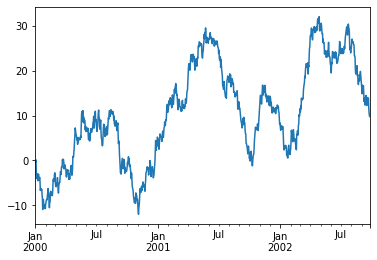

In [167]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()
#x축은 index기준

In [168]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']) ;df

,A,B,C,D
2000-01-01,-0.860490,0.555997,-0.436714,1.444383
2000-01-02,0.579586,0.735024,-0.801719,0.154875
2000-01-03,1.238687,0.652336,0.135714,0.983494
2000-01-04,2.301967,0.542351,-0.111811,0.043862
2000-01-05,-0.523725,-0.057089,0.665196,1.323875
...,...,...,...,...
2002-09-22,-0.626811,0.890882,2.697484,0.064736
2002-09-23,-1.755974,-1.889228,-0.210951,-0.164218
2002-09-24,1.317419,-0.079048,1.451048,-0.306103
2002-09-25,0.057416,-0.078178,-0.504642,-1.236592


In [169]:
df = df.cumsum()

<AxesSubplot:>

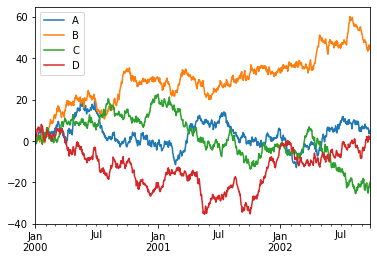

In [170]:
df.plot()
#plt.figure(); df.plot(); plt.legend(loc='best')
#네모박스가 legend >>> legend의 베스트 위치는 전체 그래프에서 가장 적당한 위치에 온다

# 12. Getting Data In / Out (데이터 입 / 출력)
## CSV

In [171]:
df.to_csv('foo.csv')
#프로그램이 있는 기본 폴더에 csv 파일 생성(c://로 직접 위치 지정 가능)

In [172]:
pd.read_csv('foo.csv')
#저장한 csv 파일 읽기 > 기존 데이터프레임의 인덱스는 Unnamed:0이라는 컬럼이 되고 새로운 인덱스 값이 붙는다.

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.860490,0.555997,-0.436714,1.444383
1,2000-01-02,-0.280903,1.291020,-1.238433,1.599259
2,2000-01-03,0.957783,1.943356,-1.102719,2.582753
3,2000-01-04,3.259751,2.485708,-1.214530,2.626615
4,2000-01-05,2.736025,2.428618,-0.549334,3.950490
...,...,...,...,...,...
995,2002-09-22,5.285221,46.418800,-21.971782,2.472902
996,2002-09-23,3.529247,44.529572,-22.182733,2.308684
997,2002-09-24,4.846666,44.450524,-20.731686,2.002581
998,2002-09-25,4.904082,44.372345,-21.236327,0.765990


In [174]:
#csv로 파일 생성할 때 인덱스값 칼럼값으로 가져지 않기 위한 방법
df.to_csv('foo1.csv', index=False)

In [175]:
pd.read_csv('foo1.csv')

,A,B,C,D
0,-0.860490,0.555997,-0.436714,1.444383
1,-0.280903,1.291020,-1.238433,1.599259
2,0.957783,1.943356,-1.102719,2.582753
3,3.259751,2.485708,-1.214530,2.626615
4,2.736025,2.428618,-0.549334,3.950490
...,...,...,...,...
995,5.285221,46.418800,-21.971782,2.472902
996,3.529247,44.529572,-22.182733,2.308684
997,4.846666,44.450524,-20.731686,2.002581
998,4.904082,44.372345,-21.236327,0.765990


## HDF5

In [176]:
#딥러닝에서 모델 저장할 때 많이 사용
df.to_hdf('foo.h5','df')

In [177]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-0.860490,0.555997,-0.436714,1.444383
2000-01-02,-0.280903,1.291020,-1.238433,1.599259
2000-01-03,0.957783,1.943356,-1.102719,2.582753
2000-01-04,3.259751,2.485708,-1.214530,2.626615
2000-01-05,2.736025,2.428618,-0.549334,3.950490
...,...,...,...,...
2002-09-22,5.285221,46.418800,-21.971782,2.472902
2002-09-23,3.529247,44.529572,-22.182733,2.308684
2002-09-24,4.846666,44.450524,-20.731686,2.002581
2002-09-25,4.904082,44.372345,-21.236327,0.765990


## Excel

In [178]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [179]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.860490,0.555997,-0.436714,1.444383
1,2000-01-02,-0.280903,1.291020,-1.238433,1.599259
2,2000-01-03,0.957783,1.943356,-1.102719,2.582753
3,2000-01-04,3.259751,2.485708,-1.214530,2.626615
4,2000-01-05,2.736025,2.428618,-0.549334,3.950490
...,...,...,...,...,...
995,2002-09-22,5.285221,46.418800,-21.971782,2.472902
996,2002-09-23,3.529247,44.529572,-22.182733,2.308684
997,2002-09-24,4.846666,44.450524,-20.731686,2.002581
998,2002-09-25,4.904082,44.372345,-21.236327,0.765990


In [180]:
#파이썬으로 엑셀을 자동화해서 사용할 수 있다.
#데이터프레임을 나중에는 직접 데이터베이스에 연결할 수 있다.

#JSON 파일 형태 : 자바스크립트에서 사용하는 문법과 유사하게 만들어진 데이터 > 딕셔너리 형태와 유사하다. (read_json, to_json)
#binary 표시되어 있는 파일 포맷은 모두 압축되어 있어 용량이 작다.

In [184]:
pd.set_option('display.max_rows', 10)
df

,A,B,C,D
2000-01-01,-0.860490,0.555997,-0.436714,1.444383
2000-01-02,-0.280903,1.291020,-1.238433,1.599259
2000-01-03,0.957783,1.943356,-1.102719,2.582753
2000-01-04,3.259751,2.485708,-1.214530,2.626615
2000-01-05,2.736025,2.428618,-0.549334,3.950490
...,...,...,...,...
2002-09-22,5.285221,46.418800,-21.971782,2.472902
2002-09-23,3.529247,44.529572,-22.182733,2.308684
2002-09-24,4.846666,44.450524,-20.731686,2.002581
2002-09-25,4.904082,44.372345,-21.236327,0.765990
